<a href="https://colab.research.google.com/github/kdidi99/ml_heidelberg/blob/main/monte-carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Monte-Carlo Simulation

Team members:

*   Rudolf Braun 
*   Jannik Schacht
*   Kieran Didi



# Hint

I found out: Mathematical symbols can be written using markdown language.

Example:

$\int_{5}^{10} f(x)dx$

Formulas can also be constructed by using this (not very fancy looking) graphical editor:

https://www.codecogs.com/eqnedit.php

# Exercise 1.1: Data Creation and Visualization


In [ ]:
import numpy as np
import numpy.random as ra
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import sklearn
import math

For inverse transform sampling we need to work out the CDFs for both likelihoods (given $X \in [0,1] \; \wedge \;  c \in [0,1]$)

-> for $Y=0: P(X=x|Y=0) = 2-2x$

CDF (c) is integral of this wrt x: $c = 2x - x²$

Inverse-CDF: $x_1 = 1 - \sqrt{1-c} \; \vee \; x_2 = 1 + \sqrt{1-c}$

$x_{2}$ is ignored because $x_{2} \notin [0,1]$ for all $c \neq 1$.

-> for $Y=1: P(X=x|Y=1) = 2x$

CDF is integral of this wrt x: $c = x²$ 

Inverse-CDF: $x_1 = \sqrt{c} \; \vee \; x_2 = -\sqrt{c}$

$x_{2}$ is ignored because $x_{2} \notin [0,1]$ for all $c \neq 0$.

In [ ]:
#this function does what the exercises requires
def create_data(N): #N is number of data instances
    labels = ra.uniform(0,1,N) #sample from uniform distribution to get a label
    labels[labels >= 0.5] = 1 #assign labels based on random sampling
    labels[labels < 0.5] = 0
    features = []
    
    for i in labels:
        rand = float(ra.uniform(0,1,1)) #sample from uniform distribution to get a random number as input for inverse CDF
        if i==1:
            features.append(math.sqrt(rand))
        elif i==0:
            features.append(-math.sqrt(-rand+1)+1)
        else:
            print("Error; label assignement did not work")
        
    return labels, features

In [ ]:
y,x = create_data(100000)

#print(y)
#print(x)

counter = 0
x0 = []
x1 = []

#split datasets via label for better visualisation
for i in x:
    if y[counter]==1:
        x1.append(i)
    elif y[counter]==0:
        x0.append(i)
    counter+=1
    
print(x0)
print(x1)

[0.31291023979573973, 0.2000216555257227, 0.3336934437716992, 0.49246558094923887, 0.03288475992811435, 0.5186301034032601, 0.8075363955196851, 0.38391576900405955, 0.9160854020800988, 0.47805898104975675, 0.2273915230424859, 0.36712521300515144, 0.10187457464553373, 0.15453494037240745, 0.5296416159214942, 0.04992979302829503, 0.00807209916954632, 0.559131702624173, 0.597761770262125, 0.6859966591750725, 0.44906873359973065, 0.3327407418852897, 0.005740364789154073, 0.04475270590405667, 0.04592815240545445, 0.7160117640826418, 0.5022247792427788, 0.6568082154446915, 0.10270738053286221, 0.8164817487244724, 0.7292295680724223, 0.05321592790206631, 0.4388637726871629, 0.06995749559409947, 0.3405031906156504, 0.18231910754031233, 0.2109236550537169, 0.3302357315495955, 0.0791908557764206, 0.06831392217259857, 0.13005865230081914, 0.06865478622987908, 0.7272824242299312, 0.148405300190265, 0.09844701411040135, 0.4324598839627968, 0.5825801346586827, 0.012867930578677522, 0.117806049809049

(array([  32.,   61.,  108.,  134.,  188.,  186.,  265.,  281.,  366.,
         430.,  433.,  465.,  506.,  587.,  573.,  618.,  663.,  708.,
         699.,  834.,  795.,  882.,  886.,  966.,  907., 1004., 1066.,
        1117., 1144., 1172., 1228., 1166., 1267., 1378., 1422., 1358.,
        1429., 1412., 1573., 1565., 1616., 1644., 1703., 1742., 1739.,
        1791., 1827., 1937., 2008., 2065.]),
 array([0.00284557, 0.02278862, 0.04273167, 0.06267472, 0.08261777,
        0.10256083, 0.12250388, 0.14244693, 0.16238998, 0.18233303,
        0.20227608, 0.22221914, 0.24216219, 0.26210524, 0.28204829,
        0.30199134, 0.3219344 , 0.34187745, 0.3618205 , 0.38176355,
        0.4017066 , 0.42164965, 0.44159271, 0.46153576, 0.48147881,
        0.50142186, 0.52136491, 0.54130796, 0.56125102, 0.58119407,
        0.60113712, 0.62108017, 0.64102322, 0.66096627, 0.68090933,
        0.70085238, 0.72079543, 0.74073848, 0.76068153, 0.78062458,
        0.80056764, 0.82051069, 0.84045374, 0.86039679, 

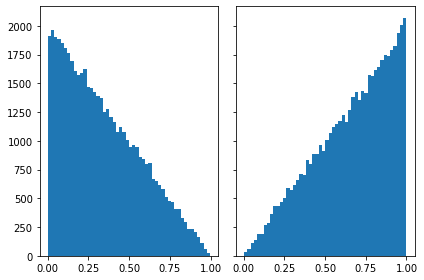

In [ ]:
#histogram plotting
n_bins = 50

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

#color= ['red' if l == 0 else 'green' for l in y]
# We can set the number of bins with the `bins` kwarg
axs[0].hist(x0, bins=n_bins)
axs[1].hist(x1, bins=n_bins)

# Exercise 1.2: Classification by Thresholding

# Exercise 1.3: Baseline Classifiers

# Exercise 1.4: Nearest Neighbour Classification

At first, the *create_data()* function from exercise 1.1 needs to be modified.

It must make sure that the created dataset contains at least one instance of either class (Y=0 and Y=1). 

This does also mean that N must be at least 2.

In [ ]:
def create_data_2(N):                 # N is number of data instances
    if N < 2:                         # check range of N
        print("Error: N must be at least 2.")
        return [],[]

    labels = ra.uniform(0, 1, N)      # sample from uniform distribution to get N-2 labels
    labels[0] = 0.0                   # add two more labels with values 0 and 1 to make sure there is at least one instance of either class.
    labels[1] = 1.0
    labels[labels >= 0.5] = 1         # assign labels based on random sampling
    labels[labels < 0.5] = 0
    features = []
    
    for i in labels:
        rand = float(ra.uniform(0,1,1))   #sample from uniform distribution to get a random number as input for inverse CDF
        if i==1:
            features.append(math.sqrt(rand))
        elif i==0:
            features.append(1-math.sqrt(1-rand))
        else:
            print("Error; label assignement did not work")
        
    return labels, features

In [ ]:
# predicts Ytest for a given Xtest using a training set Xtrain, Ytrain and nearest neighbour classification
def toy_nearest_neighbor(Xtest, Xtrain, Ytrain):

    # calculate difference between Xtest and every X of the training set
    X_diff = [abs(Xtest - x) for x in Xtrain]

    # choose index where the difference is minimal (nearest training instance)
    i_head = np.argmin(X_diff)

    # return label of the nearest training instance
    return Ytrain[i_head]

In [ ]:
# compute average error of nearest neigbour classifier
# N = size of training set
# M = size of test set
def toy_nearest_neighbor_error(N, M):

    # this variable counts the errors
    errors = 0

    # create a new test set of size M
    Ytest, Xtest = create_data_2(M)

    # repeat computation with 100 different training sets
    iterations = 100
    for i in range(iterations):
        
        # create a new training set of size N
        Ytrain, Xtrain = create_data_2(N)

        # test classifier with every element of the test set
        for y,x in zip(Ytest, Xtest):

            if y != toy_nearest_neighbor(x, Xtrain, Ytrain):
                # prediction not correct
                errors += 1

    # calculate and return average error
    return errors / (iterations * M)

In [ ]:
# a size of 10000 elements for the test set is considered to be sufficiently large 
# calculate average error for training sets of size N=2
error = toy_nearest_neighbor_error(2, 10000) * 100
print("Error for N=2:", error, "%")

# calculate average error for training sets of size N=100
error = toy_nearest_neighbor_error(100, 10000) * 100
print("Error for N=100:", error, "%")

Error for N=2: 34.4184 %
Error for N=100: 33.3459 %
